# RCC data analysis

## Introduction and aims 

This small project will use python to examine some features of mutations in renal cell carcinoma. There are 3 main histologies for renal cell carcinoma: 

- clear cell renal cell carcinoma 
- chromophobe renal cell carcinoma
- papillary renal cell carcinoma 

The data being analysed will have information about mutation rate, patient gender, patient survival time, the stage of the cancer, the overall number of somatic mutations within the tumor and the mutation status of three driver genes (BAP1, PTEN and TP53) for each of the 3 main renal cancer histologies. 

This project will look at these different attributes and perform analyses to determine if there are any significant differences between histology and 
 - a) overall mutation rate 
 - b) mutations within specific driver genes 
 - c) survival of patients  

The data is freely available from the TCGA datasets. 

## Import data to be analysed 

In [4]:
# import the packages required for the analysis 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# import the .csv dataset using the pandas read.csv() function 
# call the dataset "rcc_raw_data"
rcc_raw_data = pd.read_csv("/Users/hillvk/desktop/python_course_final_project/rcc_data_python.csv", 
                            delimiter = ",", 
                            index_col=False)     # tell pandas to not use the first row as row names

In [6]:
# take a look at the first 10 rows to make sure the data has been imported correctly 
rcc_raw_data.head(n=10)

,sample,histology,gender,status_1_alive,survival_days,pathologic_stage,mutation_count,BAP1,PTEN,TP53
0,TCGA-5P-A9K3,KIRP,MALE,1,471,Unknown,90,0,0,1
1,TCGA-5P-A9JY,KIRP,MALE,1,1508,Unknown,160,0,1,0
2,TCGA-5P-A9K0,KIRP,MALE,0,677,Unknown,131,0,0,0
3,TCGA-5P-A9KA,KIRP,MALE,0,395,Unknown,129,0,0,0
4,TCGA-5P-A9KE,KIRP,MALE,0,824,Unknown,119,0,0,0
5,TCGA-B9-4116,KIRP,FEMALE,0,627,Unknown,118,0,0,0
6,TCGA-5P-A9JW,KIRP,MALE,0,3241,Unknown,118,0,0,0
7,TCGA-5P-A9KC,KIRP,FEMALE,0,377,Unknown,115,0,0,0
8,TCGA-B9-4114,KIRP,MALE,0,857,Unknown,114,0,0,0
9,TCGA-B9-5156,KIRP,MALE,0,1338,Unknown,112,0,0,0


In [7]:
rcc_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 10 columns):
sample              803 non-null object
histology           803 non-null object
gender              803 non-null object
status_1_alive      803 non-null int64
survival_days       803 non-null object
pathologic_stage    803 non-null object
mutation_count      803 non-null int64
BAP1                803 non-null int64
PTEN                803 non-null int64
TP53                803 non-null int64
dtypes: int64(5), object(5)
memory usage: 62.8+ KB


The data looks good, the headings are correct, there are no missing values, move on to do some simple inspections of the data to see what is available. 

## Calculate some of the data attributes 

### How many samples of each histology are within the dataset? 

In [11]:
# count how many of each histology are in the dataset 
# output as a dataframe 
hist_count = rcc_raw_data.groupby('histology', as_index=False)['sample'].count()

# print the new varaible, 'hist_count' 
print(hist_count)

  histology  sample
0      KICH      65
1      KIRC     472
2      KIRP     266


- the dataset consists mostly of KIRC samples (clear cell histology) and comparatively few KICH samples (chromophobe histology)
- the sample counts are likley big enough to perform meaningful statistical tests 

### What is the mean mutation count of tumors within each histology? 

In [12]:
mut_mean = rcc_raw_data.groupby('histology', as_index=False)['mutation_count'].mean()
print(mut_mean)

  histology  mutation_count
0      KICH       50.276923
1      KIRC       80.300847
2      KIRP      118.063910


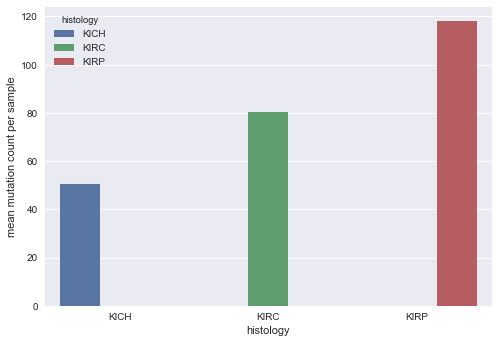

In [13]:
ax = sns.barplot(x="histology", y="mutation_count", hue="histology", data=mut_mean)
ax.set(xlabel='histology', ylabel = 'mean mutation count per sample')
plt.show()

On average, there are mutations in KIRP samples than KIRC or KICH samples. 

### What is the median mutation count of each histology? 

In [14]:
mut_median = rcc_raw_data.groupby('histology', as_index=False)['mutation_count'].median()
print(mut_median)

  histology  mutation_count
0      KICH            31.0
1      KIRC            76.0
2      KIRP           100.5


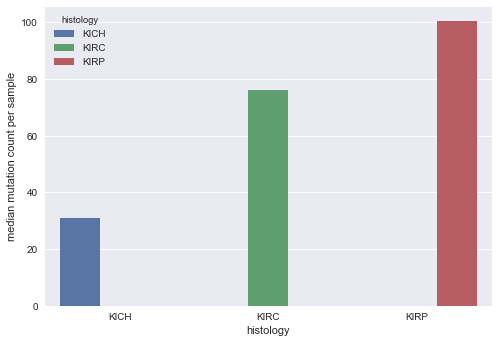

In [15]:
ax = sns.barplot(x="histology", y="mutation_count", hue="histology", data=mut_median)
ax.set(xlabel = 'histology', ylabel = 'median mutation count per sample')
plt.show()

### What is the gender distribution in each histology? 

In [25]:
# determine how many male and female samples are present within the dataset for each histology
# groupby two features, histology and gender and use the count function on the sample column 
# return the data as a dataframe
gender_hist_dist = rcc_raw_data.groupby(['histology', 'gender'], as_index=False)['sample'].count()
print(gender_hist_dist)

  histology  gender  sample
0      KICH  FEMALE      27
1      KICH    MALE      38
2      KIRC  FEMALE     173
3      KIRC    MALE     299
4      KIRP  FEMALE      67
5      KIRP    MALE     199


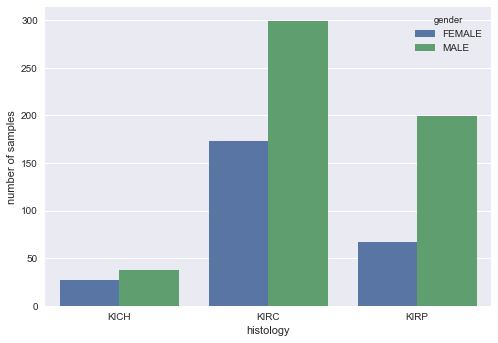

In [24]:
# draw a bar plot of the above results to easily visualize the gender distributions per histology 
ax = sns.barplot(x="histology", y="sample", hue="gender", data=gender_hist_dist)
ax.set(xlabel = 'histology', ylabel = 'number of samples')
plt.show()

### What is the mutation rate of each of the 3 driver genes in each histology? 

In [52]:
# pull out the information for mutated samples from the dataframe 
# do this separately for each gene 
BAP1_mutated = rcc_raw_data.loc[rcc_raw_data['BAP1']==1]   # pull out all entries where BAP1 is mutated
PTEN_mutated = rcc_raw_data.loc[rcc_raw_data['PTEN']==1]   # pull out all entries where PTEN is mutated
TP53_mutated = rcc_raw_data.loc[rcc_raw_data['TP53']==1]   # pull out all entries where TP53 is mutated 

In [61]:
# break down how many samples are mutated in BAP1 for each histology 
BAP1_mut_grouped = BAP1_mutated.groupby(['histology'], as_index=False)['sample'].count()
print(BAP1_mut_grouped)

  histology  sample
0      KIRC      51
1      KIRP      15


In [60]:
# break down how many samples are mutated in PTEN for each histology 
PTEN_mut_grouped = PTEN_mutated.groupby(['histology'], as_index=False)['sample'].count()
print(PTEN_mut_grouped)

  histology  sample
0      KICH       6
1      KIRC      21
2      KIRP       9


In [59]:
# break down how many samples are mutated in TP53 for each histology
TP53_mut_grouped = TP53_mutated.groupby(['histology'], as_index=False)['sample'].count()
print(TP53_mut_grouped)

  histology  sample
0      KICH      21
1      KIRC      14
2      KIRP       4


### What is the gender distribution in mutated samples? 

In [33]:
# groupby histlogy, gender and BAP1 mutation status 
# count how many samples are within each group & create a dataframe containing this information 
BAP1 = rcc_raw_data.groupby(['histology', 'gender', 'BAP1'], as_index=False)['sample'].count()
print(BAP1)

  histology  gender  BAP1  sample
0      KICH  FEMALE     0      27
1      KICH    MALE     0      38
2      KIRC  FEMALE     0     145
3      KIRC  FEMALE     1      28
4      KIRC    MALE     0     276
5      KIRC    MALE     1      23
6      KIRP  FEMALE     0      64
7      KIRP  FEMALE     1       3
8      KIRP    MALE     0     187
9      KIRP    MALE     1      12


In [49]:
BAP1_mutated = rcc_raw_data.loc[rcc_raw_data['BAP1']==1]

In [50]:
BAP1_mut_grouped = BAP1_mutated.groupby(['histology', 'gender'], as_index=False)['sample'].count()
print(BAP1_mut_grouped)

  histology  gender  sample
0      KIRC  FEMALE      28
1      KIRC    MALE      23
2      KIRP  FEMALE       3
3      KIRP    MALE      12
